In [206]:
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.io import readsav
from matplotlib import cm
import cartopy.crs as ccrs
from scipy.ndimage import gaussian_filter
homedir = os.path.expanduser("~")
datadir = f"{homedir}/uoedrive/data/gcm_w1049full"

In [4]:
# Read in all picaso spectrum and flux maps

inc_read = [0]  # different inclination, 0:equator-on; 90:pole-on
time_hour = np.loadtxt(f'{datadir}/time_hour.txt')
timeread = np.arange(1, len(time_hour)+1)  # time number

sym_fac = 1/(2*np.pi)  # from picaso disco.py, only for number of T angles > 1

In [5]:
# Read picaso spectrum
for m3 in range(len(timeread)):
    pathuse = f'{datadir}/spectrum-ck/time{timeread[m3]}.inc{inc_read[0]}'
            
    # Read latitude data
    latitude = np.loadtxt(f'{pathuse}/latitude_degree.txt')
    nlat = len(latitude)
            
    # Read longitude data
    longitude = np.loadtxt(f'{pathuse}/longitude_degree.txt')
    nlon = len(longitude)
                  
    # Read gweight data
    gweight = np.loadtxt(f'{pathuse}/gweight.txt')
    ng = len(gweight)
            
    # Read tweight data
    tweight = np.loadtxt(f'{pathuse}/tweight.txt')
    nt = len(tweight)
            
    # Read wavelength data
    wavelength = np.loadtxt(f'{pathuse}/wavelength_micron.txt')
    nwave = len(wavelength)
            
    # Read thermal spectrum data
    thermal_spectrum = np.loadtxt(f'{pathuse}/thermal_ergcm3s.txt')
    
    if m3 == 0:
        # Initialize arrays to store data
        flux3d_weighted_all = np.zeros((len(time_hour), nwave, nt, ng))  # Will be resized
        thermalflux_all = np.zeros((len(time_hour), nwave))  # Will be resized
    
    # Read flux3d data
    with open(f'{pathuse}/flux3d', 'rb') as fileID:
        tempe = np.fromfile(fileID, dtype='float32', count=nwave*nt*ng)
        flux3d = tempe.reshape((nwave, nt, ng), order='F')  

    # Calculate total thermal flux
    flux3d_weighted = np.zeros_like(flux3d)
            
    for n1 in range(ng):
        for n2 in range(nt):
            flux3d_weighted[:, n2, n1] = flux3d[:, n2, n1] * gweight[n1] * tweight[n2] * sym_fac
            
    # Store results in arrays (need to initialize these properly first)
    flux3d_weighted_all[m3, :, :, :] = flux3d_weighted
    thermalflux_all[m3, :] = thermal_spectrum

print(nlat, nlon)

61 61


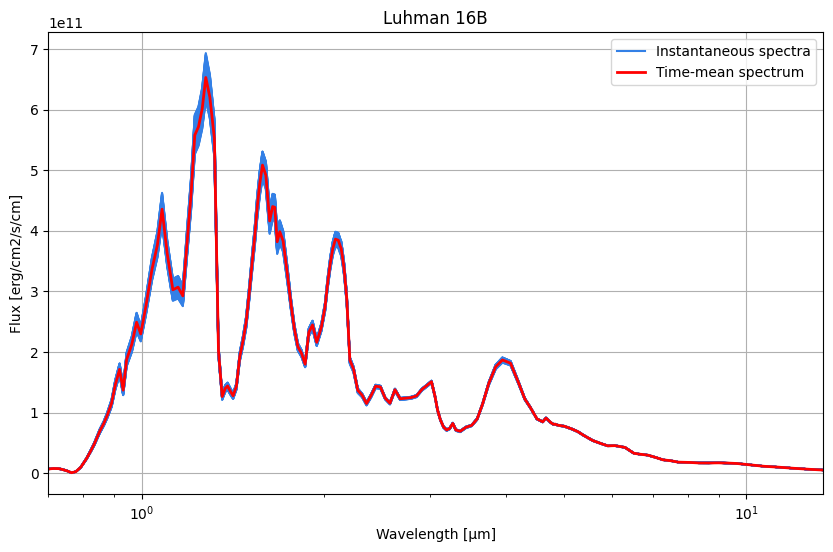

In [6]:
# Basic spectra erg/cm2/s/cm
plt.figure(figsize=(10, 6))
for n in range(len(timeread)):
    otherquan = thermalflux_all[n, :]
    if n == 0:
        p3 = plt.plot(wavelength, otherquan, color=[0.2, 0.5, 0.9], label='Instantaneous spectra')
    else:
        plt.plot(wavelength, otherquan, color=[0.2, 0.5, 0.9])
        
quantity = np.sum(thermalflux_all[:, :], axis=0) / len(timeread)
p2 = plt.plot(wavelength, quantity, linewidth=2, color='r', label='Time-mean spectrum')

plt.gca().set_xscale('log')
plt.xlabel('Wavelength [μm]')
plt.ylabel('Flux [erg/cm2/s/cm]')
plt.xlim([0.7, 13.4])
plt.title('Luhman 16B')
plt.legend()
plt.grid(True)

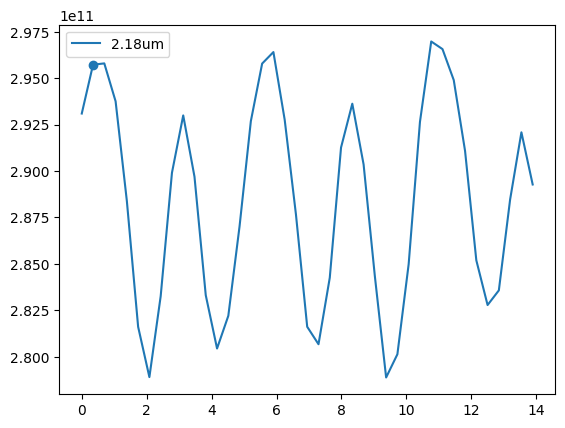

In [7]:
wlind = np.where((wavelength>2.15) & (wavelength<2.2))[0][0]
plt.plot(time_hour, thermalflux_all[:, wlind], label=f"{wavelength[wlind]:.2f}um")
t=1
plt.scatter(time_hour[t], thermalflux_all[t, wlind])
plt.legend()

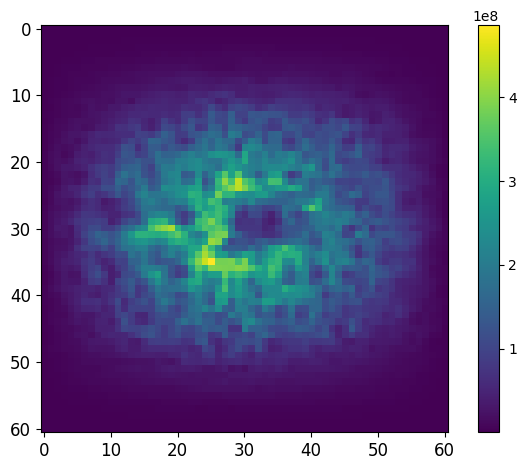

In [158]:
# Example of spatial pattern
m3use = 	28 #timeread[-1] - 1  # time 
wavewant = 2.18	# micron
distance = np.sqrt((wavelength - wavewant)**2)
nwaveshow = np.argmin(distance)
quantity = flux3d_weighted_all[m3use, nwaveshow, :, :]
#quantity = quantity / np.nanmax(flux3d_weighted_all[:, nwaveshow, :, :])
# Create the contour plot
plt.figure()
#cs = plt.contourf(longitude, latitude, img, 20, cmap='viridis', linewidths=0)  # 'linecolor'='none' equivalent
cs = plt.imshow(quantity)
# Formatting
#plt.xlabel('Longitude [deg]')
#plt.ylabel('Latitude [deg]')
plt.gca().tick_params(labelsize=12)

# Add colorbar if needed
plt.colorbar(cs)

plt.tight_layout()
plt.show()

In [364]:
def find_closest_index(array, target):
    # Compute the absolute difference between each element and the target
    differences = np.abs(array - target)
    # Find the index of the smallest difference
    closest_index = np.argmin(differences)
    return closest_index

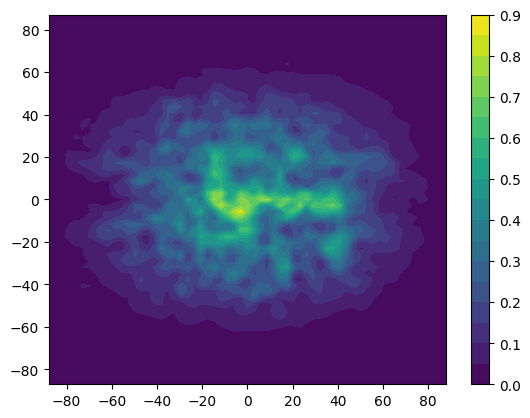

In [33]:
img = quantity / np.nanmax(flux3d_weighted_all[:, nwaveshow, :, :])

plt.contourf(longitude, latitude, img, 20)
plt.colorbar()

1


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


2


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


3


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


4


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


5


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


6


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


7


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


8


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


9


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


10


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


11


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


12


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


13


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


14


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


15


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


16


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


17


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


18


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


19


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


20


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


21


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


22


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


23


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


24


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


25


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


26


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


27


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


28


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


29


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


30


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


31


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


32


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


33


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


34


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


35


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


36


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


37


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


38


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


39


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


40


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


41


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


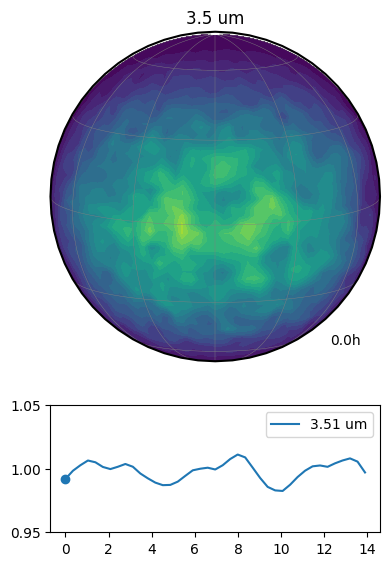

In [42]:
for timestep in timeread:
    m3use = timestep - 1 #timeread[-1] - 1  # time 
    print(timestep)
    wavewant = 3.5	# micron
    wlind = find_closest_index(wavelength, wavewant)
    #wlind = np.where((wavelength>(wavewant-0.5)) & (wavelength<wavewant))[0][-1]
    distance = np.sqrt((wavelength - wavewant)**2)
    nwaveshow = np.argmin(distance)
    quantity = flux3d_weighted_all[m3use, nwaveshow, :, :]
    img = quantity / np.nanmax(flux3d_weighted_all[:, nwaveshow, :, :])

    fig, (ax1, ax2) = plt.subplots(
            2, 1,
            figsize=(4, 6),  # Total figure size
            gridspec_kw={'height_ratios': [3, 1]},  # ax1 3x taller than ax2
        )
    # Set Orthographic projection for ax1
    ax1.remove()  # Remove the default subplot
    inc = 80
    ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.Orthographic(0, 90-inc))
    time_text = ax1.text(0.85, 0.05,'', transform=ax1.transAxes)
    gl = ax1.gridlines(xlocs=range(-180, 180, 30), ylocs=range(-90, 90, 30), color='gray', linewidth=0.3)
    #im = ax.imshow(img, origin="lower", extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), vmin=0., vmax=1.0)
    im = ax1.contourf(longitude, latitude, img, 20, transform=ccrs.PlateCarree(), cmap='viridis', linewidths=0, vmin=0, vmax=0.95)
    ax1.set_title(f"{wavewant} um")
    
    # plot lightcurve
    lc = thermalflux_all[:, wlind] / np.nanmedian(thermalflux_all[:, wlind])
    ax2.plot(time_hour, lc, label=f"{wavelength[wlind]:.2f} um")
    ax2.scatter(time_hour[m3use], lc[m3use])
    ax2.set_xticks(np.arange(0, 15, 2))
    ax2.set_ylim(0.95, 1.05)
    ax2.legend(loc="upper right")
    time_text.set_text(f"{time_hour[m3use]:.1f}h")
    for item in ax1.spines.values():
        item.set_linewidth(1.5)
    plt.tight_layout()
    plt.savefig(f"{datadir}/orthmaps/wl{str(wavewant)}_{timestep}.png")
    if timestep != 1:
        plt.close()

Stitch global map

In [ ]:
from scipy.interpolate import griddata

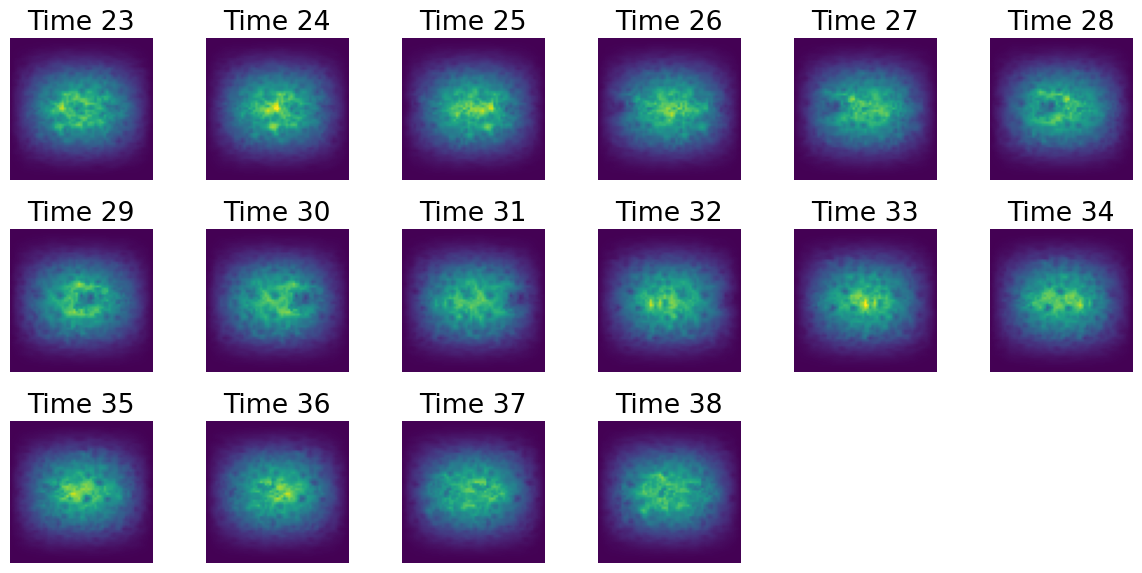

In [424]:
snapshots = []
for m3use in range(22, 38): #timeread[-1] - 1  # time 
    wavewant = 2.18	# micron
    wavewant = 3.51	# micron
    distance = np.sqrt((wavelength - wavewant)**2)
    nwaveshow = np.argmin(distance)
    quantity = flux3d_weighted_all[m3use, nwaveshow, :, :]
    img = quantity / np.nanmax(flux3d_weighted_all[:, nwaveshow, :, :])
    snapshots.append(img)
plt.figure(figsize=(12, 6))
for i, snapshot in enumerate(snapshots):
    plt.subplot(3, 6, i+1)
    plt.imshow(snapshot, vmin=0, vmax=0.95)
    plt.title(f'Time {i+23}')
    plt.axis('off')
plt.tight_layout()

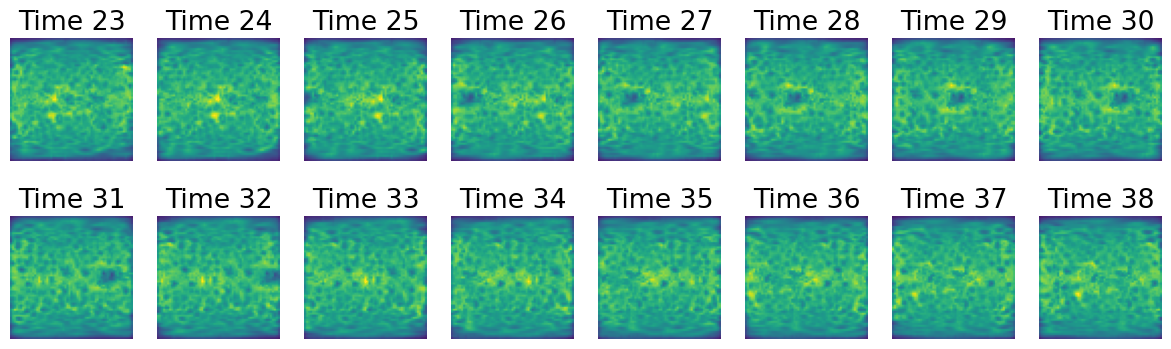

In [425]:
def correct_limb_darkening(patch, lat_grid, lon_grid, u1=0.6, u2=0.5, ver=False):
    """
    Correct limb darkening for a 61x61 patch centered at (lat=0, lon=0).
    lat_grid, lon_grid: 61x61 arrays of coordinates.
    Uses linear model: I_corrected = I_observed / (1 - u * (1 - mu)), mu = cos(theta).
    """
    # Convert to radians for spherical geometry
    lat_rad, lon_rad = np.radians(lat_grid), np.radians(lon_grid)
    lat_center_rad, lon_center_rad = 0, 0  # Hardcoded center
    
    # Great-circle distance to patch center (edge-on view)
    sin_lat, cos_lat = np.sin(lat_rad), np.cos(lat_rad)
    sin_lat_c, cos_lat_c = np.sin(lat_center_rad), np.cos(lat_center_rad)
    delta_lon = lon_rad - lon_center_rad
    mu = sin_lat * sin_lat_c + cos_lat * cos_lat_c * np.cos(delta_lon)
    mu_ver = np.cos(lon_rad).clip(0, 1)
    mu = mu.clip(0, 1)  # Avoid numerical issues
    if ver:
        mu = mu_ver
    
    # Linear limb darkening correction
    #darkening_factor = 1 - u1 * (1 - mu)
    darkening_factor = 1 - u1 * (1 - mu) - u2 * (1 - mu)**2
    if False:
        plt.figure()
        plt.imshow(darkening_factor)
        plt.colorbar()
    corrected = patch.astype(float) / darkening_factor
    return corrected

plt.figure(figsize=(12, 4))
lat_grid, lon_grid = np.meshgrid(latitude, longitude)
nonlimbimgs = []
for i, snapshot in enumerate(snapshots):
    nonlimbimg = correct_limb_darkening(snapshot, lat_grid, lon_grid, u1=0.5, u2=0.5)
    nonlimbimg = correct_limb_darkening(nonlimbimg, lat_grid, lon_grid, u1=0.5, u2=0.2)
    nonlimbimg = correct_limb_darkening(nonlimbimg, lat_grid, lon_grid, u1=0.9, u2=0.0, ver=True)
    nonlimbimgs.append(nonlimbimg)
    plt.subplot(2, 8, i+1)
    plt.imshow(nonlimbimg, vmin=0, vmax=0.95)
    plt.title(f'Time {i+23}')
    plt.axis('off')
plt.tight_layout()

180.0 -177.07 180.0
[92.24 87.1 ] [-92.24 -87.1 ]
(90, 180) (90, 180) (90, 180)
157.5 -179.09 177.99
[69.74 87.1 ] [-114.74  -87.1 ]
(90, 180) (90, 180) (90, 180)
135.0 -178.17000000000002 178.9
[47.24 87.1 ] [-137.24  -87.1 ]
(90, 180) (90, 180) (90, 180)
112.5 -177.26 179.81
[24.74 87.1 ] [-159.74  -87.1 ]
(90, 180) (90, 180) (90, 180)
90.0 2.239999999999995 177.76
[ 2.24 87.1 ] [177.76 -87.1 ]
(90, 180) (90, 180) (90, 180)
67.5 -20.25999999999999 155.26
[-20.26  87.1 ] [155.26 -87.1 ]
(90, 180) (90, 180) (90, 180)
45.0 -42.75999999999999 132.76
[-42.76  87.1 ] [132.76 -87.1 ]
(90, 180) (90, 180) (90, 180)
22.5 -65.25999999999999 110.26
[-65.26  87.1 ] [110.26 -87.1 ]
(90, 180) (90, 180) (90, 180)
0.0 -87.75999999999999 87.76
[-87.76  87.1 ] [ 87.76 -87.1 ]
(90, 180) (90, 180) (90, 180)
-22.5 -110.25999999999999 65.26
[-110.26   87.1 ] [ 65.26 -87.1 ]
(90, 180) (90, 180) (90, 180)
-45.0 -132.76 42.760000000000005
[-132.76   87.1 ] [ 42.76 -87.1 ]
(90, 180) (90, 180) (90, 180)
-67.5 -

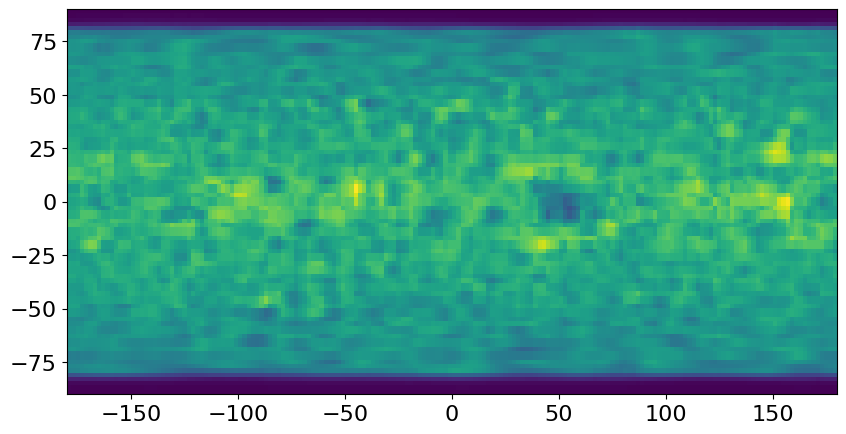

In [426]:
coarse_level = 2
def stitch_global_map(corrected_patches, lon_centers, lat_grid, lon_grid, output_res=(int(180/coarse_level), int(360/coarse_level))):
    """
    Stitch 16 corrected 61x61 patches into a global map.
    corrected_patches: List of 61x61 NumPy arrays (limb darkening corrected).
    lon_centers: List of 16 longitude centers (degrees, e.g., [0, 22.5, ...]).
    lat_grid, lon_grid: 61x61 arrays of coordinates (-87.76 to 87.76, -87.1 to 87.1).
    output_res: (lon_res, lat_res) for global map.
    """
    # Global output grid
    lon_out = np.linspace(-180, 180, output_res[1])
    lat_out = np.linspace(-90, 90, output_res[0])
    lon_out_grid, lat_out_grid = np.meshgrid(lon_out, lat_out)
    global_map = np.zeros(output_res)
    global_weights = np.zeros(output_res)
    
    for patch, lon_c in zip(corrected_patches, lon_centers):
        # Shift patch longitude to global coordinates
        lon_shifted = (lon_grid + lon_c) % 360
        lon_shifted = np.where(lon_shifted > 180, lon_shifted - 360, lon_shifted)
        print(lon_c, lon_shifted.min(), lon_shifted.max())
        
        # Interpolate to global grid
        points = np.c_[lon_shifted.ravel(), lat_grid.ravel()]
        values = patch.ravel()
        interp = griddata(points, values, (lon_out_grid, lat_out_grid), method='nearest', fill_value=0)
        
        print(points[0], points[-1])
        # plt.imshow(interp, origin='lower', extent=[-180, 180, -90, 90])
        # plt.colorbar()
        # plt.show()

        # Weight by distance from center (Gaussian, sigma=30° for smooth blending)
        lon_diff = (lon_out_grid - lon_c) % 360
        lon_diff = np.minimum(lon_diff, 360 - lon_diff)
        dist = np.sqrt(lon_diff**2 + lat_out_grid**2)
        weights = np.exp(-dist**2 / (2 * 15**2))
        #weights[dist > 90] = 0  # Limit to patch bounds
        
        print(global_map.shape, interp.shape, weights.shape)
        global_map += interp * weights
        global_weights += weights
    
    global_map = global_map / np.maximum(global_weights, 1e-6)  # Normalize
    return lon_out, lat_out, global_map

lon_centers = np.arange(180, -180, -22.5)  # 16 patches
lon_grid, lat_grid = np.meshgrid(longitude, latitude)
lon_out, lat_out, global_map = stitch_global_map(nonlimbimgs, lon_centers, lat_grid, lon_grid)
plt.figure(figsize=(10, 5))
plt.imshow(global_map, extent=(-180, 180, -90, 90), cmap='viridis')

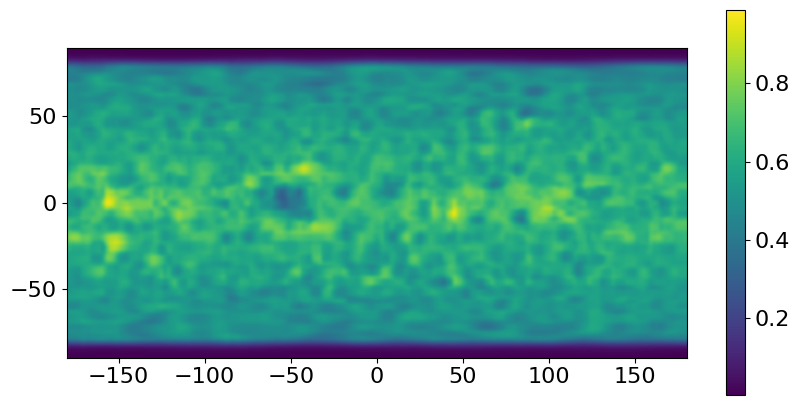

In [427]:
plt.figure(figsize=(10, 5))
plt.imshow(np.flip(global_map), extent=(-180, 180, -90, 90), interpolation='bicubic')
#plt.contourf(lon_out, lat_out, global_map, level=20, extent=(-180, 180, -90, 90), )
plt.colorbar()

In [ ]:
np.savetxt('../data/modelmaps/1049b.txt', global_map, fmt='%.6e', delimiter=' ')

Make proposal plot

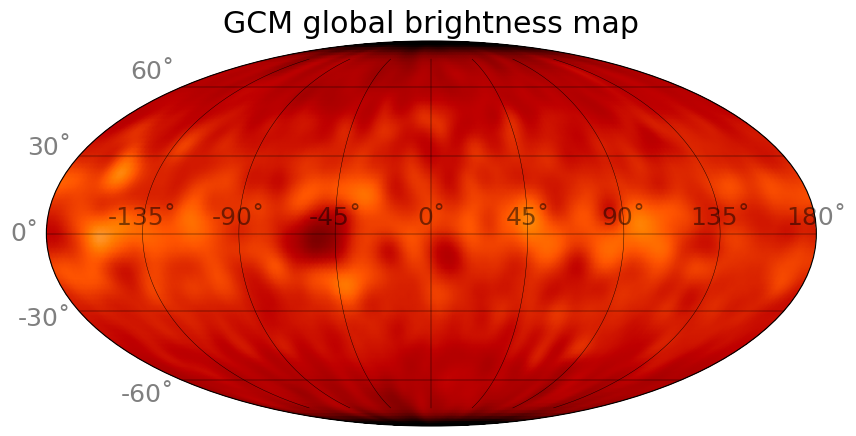

In [431]:
# GCM global map
plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
# Set Orthographic projection for ax1
ax1.remove()  # Remove the default subplot
ax1 = fig.add_subplot(1, 1, 1, projection='mollweide')
ax1.set_title("GCM global brightness map")
ax1.grid('major', color='k', linewidth=0.3)
im = ax1.pcolormesh(lon_out*np.pi/180, lat_out*np.pi/180, 
                    gaussian_filter(np.flip(global_map), sigma=2), 
                    shading='gouraud', cmap="gist_heat", vmin=0.1, vmax=1)
yticks = np.linspace(-np.pi/2, np.pi/2, 7)[1:-1]
xticks = np.linspace(-np.pi, np.pi, 9)[1:]
ax1.set_yticks(yticks, labels=[f'{deg:.0f}˚' for deg in yticks*180/np.pi], alpha=0.5)
ax1.set_xticks(xticks, labels=[f'{deg:.0f}˚' for deg in xticks*180/np.pi], alpha=0.5)
time_text = ax1.text(0.85, 0.05,'', transform=ax1.transAxes)


In [249]:
def fill_nan_2d(array, method='linear'):
    # Create grid coordinates
    rows, cols = array.shape
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    # Get valid (non-NaN) points and values
    mask = ~np.isnan(array)
    points = np.c_[x[mask].ravel(), y[mask].ravel()]
    values = array[mask].ravel()
    
    # Get all grid points (including NaNs)
    all_points = np.c_[x.ravel(), y.ravel()]
    
    # Interpolate to fill NaNs
    filled_values = griddata(points, values, all_points, method=method, fill_value=np.nanmean(values))
    
    # Reshape to original 2D shape
    filled_array = filled_values.reshape(rows, cols)
    
    return filled_array

In [ ]:
tind = np.s_[22:38]
t_hours = (time_hour[tind] - time_hour[tind][0])
t_phases = 360 * t_hours / t_hours[-1]
t_phases

array([  0.        ,  23.98617512,  47.97235023,  72.02764977,
        96.01382488, 120.        , 143.98617512, 167.97235023,
       192.02764977, 216.01382488, 240.        , 263.98617512,
       288.04147465, 312.02764977, 336.01382488, 360.        ])

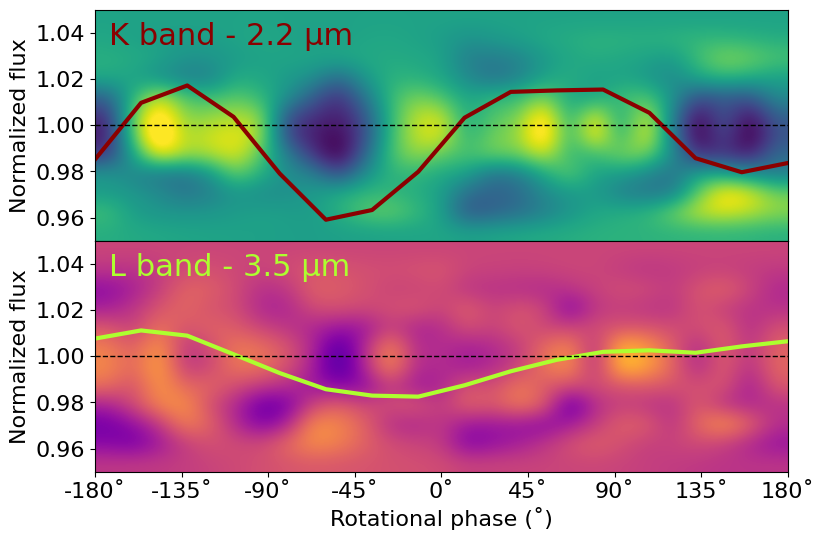

In [434]:
# plot lightcurve
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
#ax1.set_title("Simulated Doppler map and lightcurves")

wavewant = 2.2	# micron
wlind = find_closest_index(wavelength, wavewant)
bestparamgrid = np.loadtxt("../output/sim_1049b/bestparamgrid.txt")
lc = thermalflux_all[:, wlind] / np.nanmedian(thermalflux_all[:, wlind])
ax1.imshow(np.flip(fill_nan_2d(bestparamgrid)), aspect=1200, vmin=82, vmax=113,
           origin="lower", extent=(-180, 180, 0.95, 1.05), interpolation='bicubic')
ax1.plot(t_phases-180, lc[tind], label=f"GCM simulated lightcurve",
          color='darkred', linewidth=3)
ax1.axhline(y=1.0, color='k', linestyle='--', linewidth=1)
ax1.set_xticks([])
ax1.set_yticks(np.arange(0.96, 1.05, 0.02))
#ax1.set_xticks(np.arange(-180, 181, 45), labels=[f'{deg:.0f}˚' for deg in np.arange(-180, 181, 45)])
#ax1.set_xlabel('Rotational phase (˚)')
ax1.set_ylim(0.95, 1.05)
ax1.set_ylabel('Normalized flux')
#ax1.legend(loc="lower right", framealpha=0)
ax1.text(0.02, 0.85, 'K band - 2.2 μm', color='darkred', fontsize=22, transform=ax1.transAxes)

wavewant = 3.5	# micron
wlind = find_closest_index(wavelength, wavewant)
bestparamgrid = np.loadtxt("../output/sim_1049b_L/bestparamgrid.txt")
lc = thermalflux_all[:, wlind] / np.nanmedian(thermalflux_all[:, wlind])
ax2.imshow(np.flip(fill_nan_2d(bestparamgrid)), aspect=1200, cmap='plasma', vmin=85, vmax=115,
           origin="lower", extent=(-180, 180, 0.95, 1.05), interpolation='bicubic')
ax2.plot(t_phases-180, lc[tind], label=f"GCM simulated lightcurve",
          color='greenyellow', linewidth=3)
ax2.axhline(y=1.0, color='k', linestyle='--', linewidth=1)
ax2.set_xticks(np.arange(-180, 181, 45), labels=[f'{deg:.0f}˚' for deg in np.arange(-180, 181, 45)])
ax2.set_xlabel('Rotational phase (˚)')
ax2.set_yticks(np.arange(0.96, 1.05, 0.02))
ax2.set_ylim(0.95, 1.05)
ax2.set_ylabel('Normalized flux')
#ax2.legend(loc="lower right", framealpha=0)
ax2.text(0.02, 0.85, 'L band - 3.5 μm', color='greenyellow', fontsize=22, transform=ax2.transAxes)
plt.subplots_adjust(hspace=0)


In [240]:
bestparamgrid

array([[     nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan],
       [ 99.6282,  99.4313,  99.2184,  99.1174,  99.1508,  99.2158,
         99.5962,  99.9766, 100.2879, 100.5732, 100.6324, 100.296 ,
         99.9596, 100.1708,  99.9861,  99.8014,  99.8669, 100.0754,
        100.2706, 100.4303, 100.59  , 100.5765, 100.5457, 100.3863,
        100.1196,  99.8787,  99.7535],
       [ 99.606 ,  99.9427,  98.7404,  97.9325,  97.4476,  98.3041,
         99.143 ,  99.9641, 100.85  , 101.3675, 100.7522, 100.1562,
         99.5716, 100.863 , 100.5327,  99.9214,  98.8418,  99.2683,
        100.2263, 101.3901, 102.1168, 102.4065, 101.9793, 101.5142,
        101.2429, 100.0661,  98.3459],
       [ 99.1454,  99.465 , 100.2805, 100.8243,  99.1746,  99.2773,

Calculate GCM metrics

In [3]:
# equlibrium geopotential
gamma = 1.
kappa = 2/7
c_p = 143000 # SI
T = 1200 # K
phi_0 = gamma * kappa * kappa * c_p * T
print(f"geopotential Phi_0 = {phi_0:.2e} m2s-2")

geopotential Phi_0 = 1.40e+07 m2s-2


In [4]:
# rotation rate
period = 5.28
omega = 2 * np.pi / (period * 3600)
print(f"rotation rate omega = {omega:.1e} s-1")

rotation rate omega = 3.3e-04 s-1


In [13]:
# thermal Rossby number
Rj = 69911000
R = 1.05 * Rj
Ro_T = phi_0 / (2 * omega * a)**2
print(f"Thermal Rossby number Ro_T = {Ro_T:.1e}")

Thermal Rossby number Ro_T = 5.9e-03


In [10]:
# radiative timescale
p = 1e5 # bar
g = 588 # m s-1
stefan_boltzmann = 5.670374419e-8
tau = (p / g) * (c_p / (4 * stefan_boltzmann * T**3))
print(f"Calculated radiative timescale = {tau:.1e}")
print(f"Non-dimensional radiative timescale = {2*omega*tau:.1e}")

Calculated radiative timescale = 6.2e+04
Non-dimensional radiative timescale = 4.1e+01


In [19]:
# Rossby deformation radius
theta_lat = 0 # latitude
f = 2 * omega * np.cos(theta_lat) # Coriolis parameter
c = 2000 # m/s sound speed
L_d_1 = np.sqrt(phi_0) / f
L_d_2 = c / f
print(f"Coriolis parameter f = {f:.1e}")
print(f"Rossby deformation radius L_d = {L_d_1:.1e} or {L_d_2:.1e} m")
print(f"BD radius R = {R:.1e} m")
print(f"L_d / R = {L_d_1/R:.2f}")

Coriolis parameter f = 6.6e-04
Rossby deformation radius L_d = 5.7e+06 or 3.0e+06 m
BD radius R = 7.3e+07 m
L_d / R = 0.08


In [23]:
# Rhines scale
beta = f / R
U = 1000 # m/s
L_b = np.pi * np.sqrt(U / beta)
print(f"Rhines scale L_b = {L_b:.1e} m")

Rhines scale L_b = 3.3e+07 m
